In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [34]:
# Load CSV file into a DataFrame
train_path = "../data/train_normalize.csv"
train_df = pd.read_csv(train_path)

# Ensure all columns are displayed
pd.set_option("display.max_columns", None)

# Display first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,60,65.0,8450,1,0,100,100,100,60,100,6,60,60,100,90,7,5,2003,2003,80,60,70,70,85,196.0,80,65,100,80,65,20,100,706,10,0,150,856,100,100,1,100,856,854,0,1710,1,0,2,1,3,1,80,8,100,0,0,80,2003.0,66,2,548,65,65,100,0,61,0,0,0,0,0,0,0,0,2,2008,80,100,208500
1,2,20,60,80.0,9600,1,0,100,100,100,40,100,25,50,60,100,70,6,8,1976,1976,80,60,40,40,0,0.0,65,65,70,80,65,100,80,978,10,0,284,1262,100,100,1,100,1262,0,0,1262,0,1,2,0,3,1,50,6,100,1,65,80,1976.0,66,2,460,65,65,100,298,0,0,0,0,0,0,0,0,0,5,2007,80,100,181500
2,3,60,60,68.0,11250,1,0,75,100,100,60,100,6,60,60,100,90,7,5,2001,2002,80,60,70,70,85,162.0,80,65,100,80,65,40,100,486,10,0,434,920,100,100,1,100,920,866,0,1786,1,0,2,1,3,1,80,6,100,1,65,80,2001.0,66,2,608,65,65,100,0,42,0,0,0,0,0,0,0,0,9,2008,80,100,223500
3,4,70,60,60.0,9550,1,0,75,100,100,80,100,7,60,60,100,90,7,5,1915,1970,80,60,60,65,0,0.0,65,65,80,65,80,20,80,216,10,0,540,756,100,80,1,100,961,756,0,1717,1,0,1,0,3,1,80,7,100,1,80,60,1998.0,33,3,642,65,65,100,0,35,272,0,0,0,0,0,0,0,2,2006,80,20,140000
4,5,60,60,84.0,14260,1,0,75,100,100,40,100,16,60,60,100,90,8,5,2000,2000,80,60,70,70,85,350.0,80,65,100,80,65,70,100,655,10,0,490,1145,100,100,1,100,1145,1053,0,2198,1,0,2,1,4,1,80,9,100,1,65,80,2000.0,66,3,836,65,65,100,192,84,0,0,0,0,0,0,0,0,12,2008,80,100,250000


In [35]:
# Define X (features) and y (target)
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Predict on training data
y_train_pred = model.predict(X_train)

# Compute RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [37]:
# Display evaluation results including both train and test RMSE
evaluation_results = pd.DataFrame({
    "Metric": ["Train RMSE", "Test RMSE", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [train_rmse, test_rmse, mae, r2]
})

print(evaluation_results)

                      Metric         Value
0                 Train RMSE  26731.844826
1                  Test RMSE  27947.015653
2  Mean Absolute Error (MAE)  18377.994668
3                   R² Score      0.839134


In [38]:
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Take absolute values and sort by importance
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Sort by smallest absolute coefficient first
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=True)

# Display the sorted feature importance DataFrame
feature_importance.head(10)

,Feature,Coefficient,Abs_Coefficient
9,Utilities,-5.349001e-10,5.349001e-10
4,LotArea,3.904411e-01,3.904411e-01
75,MiscVal,6.932828e-01,6.932828e-01
34,BsmtFinSF1,2.531550e+00,2.531550e+00
38,TotalBsmtSF,3.552131e+00,3.552131e+00
0,Id,-3.684142e+00,3.684142e+00
37,BsmtUnfSF,-4.479668e+00,4.479668e+00
36,BsmtFinSF2,5.500249e+00,5.500249e+00
67,OpenPorchSF,7.297108e+00,7.297108e+00
64,GarageCond,1.126182e+01,1.126182e+01


### Feature Removal Analysis in Linear Regression

After analyzing the absolute values of the feature coefficients, I removed the features with the **smallest absolute coefficients**, assuming they had the least impact on the target variable (**SalePrice**). 

However, after retraining the Linear Regression model without these features, the **R² score did not improve**. This indicates that feature removal **did not help** in this case.

Possible reasons:
- The removed features, even with low coefficients, might still contribute to the model’s overall prediction.
- Linear Regression does not inherently benefit from feature selection as much as models like Lasso Regression or tree-based methods.
- The dataset might require more complex transformations or interactions rather than simply removing features.

Since feature removal did not enhance performance, **keeping all features might be the better approach** for this Linear Regression model.


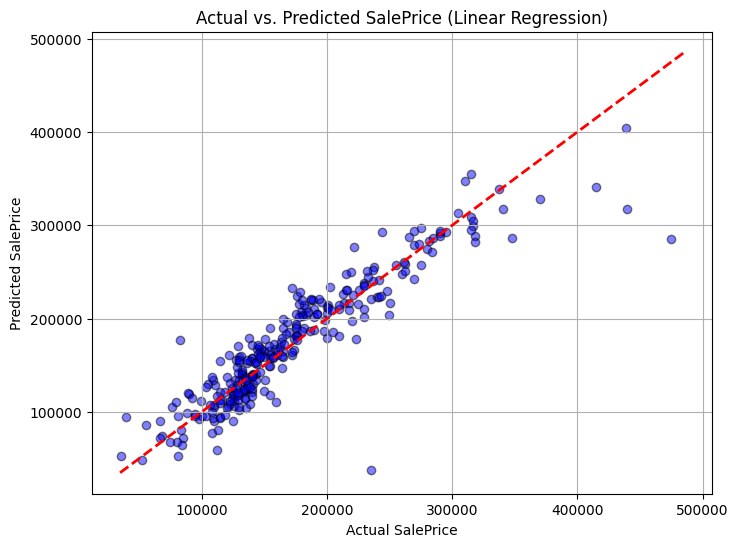

In [39]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red", linewidth=2)  # Ideal fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Linear Regression)")
plt.grid(True)
plt.show()

In [40]:
# Load the test dataset into a DataFrame
test_path = "../data/test_normalize.csv"
test_df = pd.read_csv(test_path)

# Predict SalePrice using the trained model
predict = model.predict(test_df)

# Create a DataFrame to store results with Id and Predicted SalePrice
results_df = test_df[["Id"]].copy()
results_df["PredictedPrice"] = predict  

# Save the results to DataFrame as a CSV file
results_df.to_csv("../results/linear_regression.csv", index=False)

print("CSV file saved successfully at: ../results/linear_regression.csv")

CSV file saved successfully at: ../results/linear_regression.csv
